In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Cargar el dataset
df_partidos = pd.read_csv('partidos_cebollitas.csv')

# Filtrar partidos donde Cebollitas FC juegue como local O visitante
df_partidos = df_partidos[
    (df_partidos['equipo_local'] == 'Cebollitas FC') |
    (df_partidos['equipo_visitante'] == 'Cebollitas FC')
]

print(f"Número de partidos disponibles: {len(df_partidos)}")

#Crear variable objetivo
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

#Variables predictoras
X = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y = df_partidos['diferencia_goles']

#Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Número de partidos disponibles: 44


In [2]:
from sklearn.linear_model import LinearRegression

#Instanciar y entrenar el modelo
mode_rl = LinearRegression()
mode_rl.fit(X_train, y_train)

print("Modelo de regresión lineal entrenado con éxito.")

Modelo de regresión lineal entrenado con éxito.


In [3]:
#Mostrar coeficientes 
print(f"Intercepto: {mode_rl.intercept_}")
print(f"Coeficientes: {mode_rl.coef_}")

#Intercepto amigable
for idx, col_name in enumerate(X.columns):
    print(f"Si aumento 1 unidad en {col_name}, la diferencia de goles esperada es {mode_rl.coef_[idx]:.2f}")

Intercepto: -5.3834402473148995
Coeficientes: [ 0.14032761 -0.18235423]
Si aumento 1 unidad en posesion_local (%), la diferencia de goles esperada es 0.14
Si aumento 1 unidad en tiros_arco_local, la diferencia de goles esperada es -0.18


In [4]:
#Hacer predicciones
y_pred = mode_rl.predict(X_test)

#Comparar predicciones vs valores reales
df_resultados = X_test.copy()
df_resultados['diferencia_goles_real'] = y_test
df_resultados['diferencia_goles_predicha'] = y_pred.round(2)

df_resultados.head()

,posesion_local (%),tiros_arco_local,diferencia_goles_real,diferencia_goles_predicha
89,41,5,0,-0.54
55,51,6,-1,0.68
58,42,10,0,-1.31
88,54,9,-2,0.55
83,47,3,3,0.66


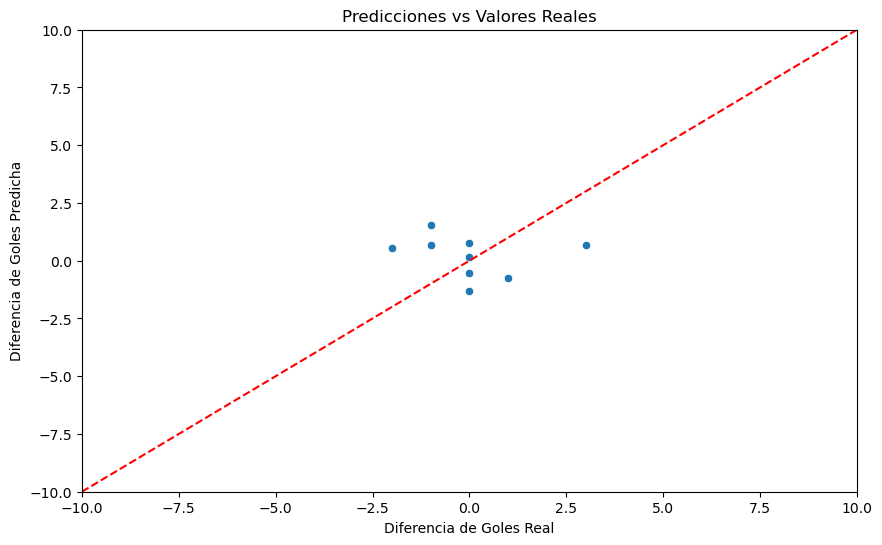

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Crear gráfico de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Diferencia de Goles Real')
plt.ylabel('Diferencia de Goles Predicha')
plt.title('Predicciones vs Valores Reales')
plt.plot([-10, 10], [-10, 10], color='red', linestyle='--')  # Línea de referencia
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [6]:
import ipywidgets as widgets

#wigets para entrada de usuario
posesion_input = widgets.FloatSlider(value=50, min=0, max=100, step=1, description='Posesión Local (%)')
tiros_arco_input = widgets.IntSlider(value=5, min=0, max=30, step=1, description='Tiros a Arco Local')

#Funcion de predicción
def predecir_diferencia_goles(posesion, tiros_arco):
    input_data = pd.DataFrame({
        'posesion_local (%)': [posesion],
        'tiros_arco_local': [tiros_arco]
    })
    prediccion = mode_rl.predict(input_data)
    print(f"Diferencia de goles predicha para Cebollitas FC: {prediccion[0]:.2f}")
    
#Mostrar widgets 
widgets.interact(predecir_diferencia_goles, posesion=posesion_input, tiros_arco=tiros_arco_input);

interactive(children=(FloatSlider(value=50.0, description='Posesión Local (%)', step=1.0), IntSlider(value=5, …